In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# הגדרת קבוע לכתובת הנתונים והשם של קובץ הפלט
# כתובת חדשה ועובדת לקובץ נתונים על מדליות אולימפיות:
OLYMPIC_DATA_URL = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/olympics.csv"
OUTPUT_FILENAME = 'olympic_processed_data.csv'

print("--- 1. Loading Olympic data from the web (FIXED URL)... ---")

try:

    df = pd.read_csv(OLYMPIC_DATA_URL)
    print(f"Data loaded successfully. DataFrame shape: {df.shape}")
    print("\nFirst 5 rows of the data:")
    print(df.head())
except Exception as e:
    print(f"Error loading data: {e}")
    df = None

--- 1. Loading Olympic data from the web (FIXED URL)... ---
Data loaded successfully. DataFrame shape: (271116, 15)

First 5 rows of the data:
   id                      name sex   age  height  weight            team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   noc        games  year  season       city          sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

               

In [8]:
if df is not None:
    print("--- 2. Processing and cleaning data... ---")

    # A. Handle Missing Values (NaN) - Drop rows with missing values in critical columns
    rows_before = len(df)
    # CORRECTED: Using lowercase column names from the new dataset
    df = df.dropna(subset=['name', 'medal', 'year', 'sport'])
    print(f"Dropped {rows_before - len(df)} rows with critical missing values.")

    # B. Feature Engineering - Encode Sex to Numeric (M: 0, F: 1)
    # CORRECTED: Using lowercase 'sex'
    df['Sex_Numeric'] = df['sex'].map({'M': 0, 'F': 1})

    # C. Feature Engineering - Create a new datetime column for better time series analysis
    # CORRECTED: Using lowercase 'year'
    df['Year_DT'] = pd.to_datetime(df['year'], format='%Y')

    print("Basic data processing complete.")
    print("\nFirst 5 rows of the processed data:")
    # CORRECTED: Displaying the new columns
    print(df[['name', 'year', 'Sex_Numeric', 'Year_DT', 'medal']].head())
else:
    print("Skipping data processing because data loading failed in the previous cell.")

--- 2. Processing and cleaning data... ---
Dropped 231333 rows with critical missing values.
Basic data processing complete.

First 5 rows of the processed data:
                        name  year  Sex_Numeric    Year_DT   medal
3       Edgar Lindenau Aabye  1900            0 1900-01-01    Gold
37      Arvo Ossian Aaltonen  1920            0 1920-01-01  Bronze
38      Arvo Ossian Aaltonen  1920            0 1920-01-01  Bronze
40  Juhamatti Tapio Aaltonen  2014            0 2014-01-01  Bronze
41   Paavo Johannes Aaltonen  1948            0 1948-01-01  Bronze


In [9]:
if df is not None:
    print("--- 3. Saving the processed file... ---")

    df.to_csv(OUTPUT_FILENAME, index=False)
    print(f"Processed data saved to file: {OUTPUT_FILENAME}")
else:
    print("Skipping data saving because data loading failed in the first cell.")

--- 3. Saving the processed file... ---
Processed data saved to file: olympic_processed_data.csv


Displaying Medal Distribution Chart

Medal Counts for Plotting:
medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


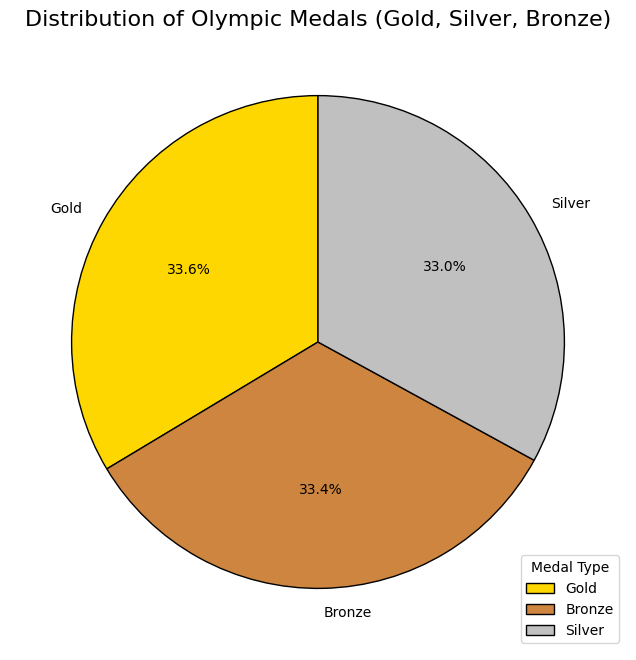

The chart was displayed successfully.


In [12]:
if df is not None:
    # Magic command to ensure plot display in Colab environment
    %matplotlib inline

    print("Displaying Medal Distribution Chart")

    # A. Summarize the data - Count the frequency of each Medal type
    # תיקון: משתמש ב-df['medal'] במקום df['Medal']
    medal_counts = df['medal'].value_counts()

    # Printing data for verification (for debugging)
    print("\nMedal Counts for Plotting:")
    print(medal_counts)

    # B. Create the Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        medal_counts.values,
        labels=medal_counts.index,
        autopct='%1.1f%%', # Format to display percentages
        startangle=90,
        colors=['gold', 'peru', 'silver'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )

    # C. Add titles and legend
    plt.title('Distribution of Olympic Medals (Gold, Silver, Bronze)', fontsize=16)
    plt.legend(title="Medal Type", loc="lower right")

    # D. Display the chart
    plt.show()
    print("The chart was displayed successfully.")
else:
    print("Skipping visualization because data loading failed in the first cell.")